# Intro to Machine Learning: Regression and Classification

- Review machine learning workflow with examples from regression and classification.
- Introduce Neural Nets and the `keras` library.
- Expand our notions of data to examine images and text.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [2]:
games = pd.read_csv('data/video-game-sales-with-ratings.zip', compression = 'zip')

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### First: no missing data or categorical data

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [5]:
#drop all missing critic scores
games = games.loc[games['Critic_Score'].notna()]

In [8]:
#games.dropna(subset = ['Critic_Score'])

In [6]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8137 entries, 0 to 16709
Data columns (total 16 columns):
Name               8137 non-null object
Platform           8137 non-null object
Year_of_Release    7983 non-null float64
Genre              8137 non-null object
Publisher          8133 non-null object
NA_Sales           8137 non-null float64
EU_Sales           8137 non-null float64
JP_Sales           8137 non-null float64
Other_Sales        8137 non-null float64
Global_Sales       8137 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         8099 non-null object
User_Count         7017 non-null float64
Developer          8131 non-null object
Rating             8054 non-null object
dtypes: float64(9), object(7)
memory usage: 1.1+ MB


In [10]:
#get rid of user_count
games.drop(columns=["User_Count"], inplace = True)

In [11]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score',
       'Critic_Count', 'User_Score', 'Developer', 'Rating'],
      dtype='object')

In [14]:
#drop any other missing data
games.dropna(inplace = True)

In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7877 entries, 0 to 16706
Data columns (total 15 columns):
Name               7877 non-null object
Platform           7877 non-null object
Year_of_Release    7877 non-null float64
Genre              7877 non-null object
Publisher          7877 non-null object
NA_Sales           7877 non-null float64
EU_Sales           7877 non-null float64
JP_Sales           7877 non-null float64
Other_Sales        7877 non-null float64
Global_Sales       7877 non-null float64
Critic_Score       7877 non-null float64
Critic_Count       7877 non-null float64
User_Score         7877 non-null object
Developer          7877 non-null object
Rating             7877 non-null object
dtypes: float64(8), object(7)
memory usage: 984.6+ KB


In [16]:
games.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,Nintendo,E


In [26]:
games.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

### Dealing with Categories

In [26]:
dummied_games = pd.get_dummies(games, columns = ['Platform', 'Genre'])

In [28]:
dummied_games = dummied_games.select_dtypes(exclude = 'object')

In [29]:
dummied_games.shape

(7877, 37)

In [30]:
dummied_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7877 entries, 0 to 16706
Data columns (total 37 columns):
Year_of_Release       7877 non-null float64
NA_Sales              7877 non-null float64
EU_Sales              7877 non-null float64
JP_Sales              7877 non-null float64
Other_Sales           7877 non-null float64
Global_Sales          7877 non-null float64
Critic_Score          7877 non-null float64
Critic_Count          7877 non-null float64
Platform_3DS          7877 non-null uint8
Platform_DC           7877 non-null uint8
Platform_DS           7877 non-null uint8
Platform_GBA          7877 non-null uint8
Platform_GC           7877 non-null uint8
Platform_PC           7877 non-null uint8
Platform_PS           7877 non-null uint8
Platform_PS2          7877 non-null uint8
Platform_PS3          7877 non-null uint8
Platform_PS4          7877 non-null uint8
Platform_PSP          7877 non-null uint8
Platform_PSV          7877 non-null uint8
Platform_Wii          7877 non-null 

In [24]:
games.shape

(7877, 15)

In [19]:
pd.get_dummies(games).shape

(7877, 6820)

In [30]:
#select numeric columns
col_list = []

In [32]:
X = dummied_games.drop('Critic_Score', axis = 1)
y = dummied_games.Critic_Score

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [35]:
lr = LinearRegression()

In [37]:
#build the model
lr.fit(X_train, y_train)
#use model to make predictions
predictions = lr.predict(X_test)

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
#evaluate your model
print(np.sqrt(mean_squared_error(y_test, predictions)))

11.790346430229862


In [40]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
forest = RandomForestRegressor(max_depth = 10)

In [58]:
forest.fit(X_train, y_train)

/Users/jacobkoehler/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
predictions = forest.predict(X_test)

In [60]:
print(np.sqrt(mean_squared_error(y_test, predictions)))

10.975464784810347


### Classification Review

In [61]:
from sklearn.datasets import load_digits

In [63]:
digits = load_digits()

In [64]:
X = digits.data
y = digits.target

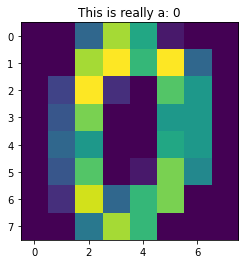

In [65]:
plt.imshow(X[0].reshape(8, 8))
plt.title('This is really a: {}'.format(y[0]));

In [66]:
#create train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 24)

In [67]:
#instantiate a knn model
knn = KNeighborsClassifier()

In [68]:
#fit
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [69]:
#predict
predictions = knn.predict(X_test)

In [70]:
#score on test using knn.score(X_test, y_test)
knn.score(X_test, y_test)

0.9911111111111112

In [75]:
#write a loop and assess the score for a KNN 
#with n_neighbors from 1 to 41 and plot scores
#of each fit
scores = []
for num_neighbors in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=num_neighbors)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    scores.append(score)

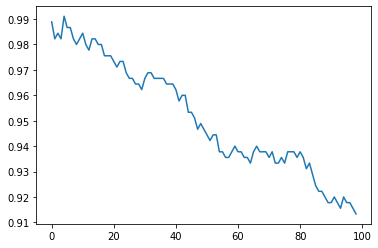

In [76]:
plt.plot(scores)